<a href="https://colab.research.google.com/github/Mani0322/Deep-learning/blob/main/X_ray_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="/content/drive/MyDrive"

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:28<00:00, 103MB/s]
100% 2.29G/2.29G [00:28<00:00, 87.4MB/s]


In [6]:
train_path = "/content/chest_xray/train"
test_path = "/content/chest_xray/test"

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import layers
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob


In [8]:
IMG_SIZE=[224,224]

In [9]:
vgg = VGG19(input_shape=IMG_SIZE+[3],weights="imagenet",include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [10]:
for layer in vgg.layers:
  layer.trainable=False


In [11]:
classes = ["NORMAL","PNEUMONIA"]

In [12]:
n_classes = len(classes)
print(n_classes)

2


In [13]:
x = Flatten()(vgg.output)


In [14]:
prediction = Dense(n_classes,activation="softmax")(x)
model = Model(inputs=vgg.input,outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [19]:
training_set = train_datagen.flow_from_directory("/content/chest_xray/train",
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 5216 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory("/content/chest_xray/test",
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 624 images belonging to 2 classes.


In [21]:
r= model.fit(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/10
163/163 [==============================] - 130s 706ms/step - loss: 0.2650 - accuracy: 0.9007 - val_loss: 0.3994 - val_accuracy: 0.8574
Epoch 2/10
163/163 [==============================] - 114s 700ms/step - loss: 0.1319 - accuracy: 0.9498 - val_loss: 0.3045 - val_accuracy: 0.8974
Epoch 3/10
163/163 [==============================] - 112s 689ms/step - loss: 0.1160 - accuracy: 0.9546 - val_loss: 0.3244 - val_accuracy: 0.8910
Epoch 4/10
163/163 [==============================] - 112s 687ms/step - loss: 0.1009 - accuracy: 0.9605 - val_loss: 0.5585 - val_accuracy: 0.8413
Epoch 5/10
163/163 [==============================] - 111s 683ms/step - loss: 0.0894 - accuracy: 0.9655 - val_loss: 0.7514 - val_accuracy: 0.7997
Epoch 6/10
163/163 [==============================] - 111s 681ms/step - loss: 0.0853 - accuracy: 0.9670 - val_loss: 0.3199 - val_accuracy: 0.8894
Epoch 7/10
163/163 [==============================] - 112s 685ms/step - loss: 0.0976 - accuracy: 0.9622 - val_loss: 0.7040 -

In [22]:
model.evaluate(test_set)

20/20 [==============================] - 11s 561ms/step - loss: 0.5994 - accuracy: 0.8654


[0.5994389653205872, 0.8653846383094788]

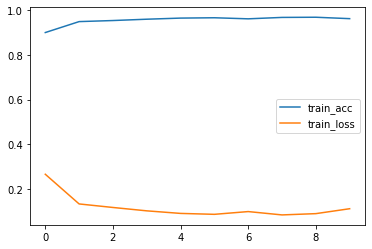

In [32]:
plt.plot(r.history["accuracy"],label="train_acc")
plt.plot(r.history["loss"],label="train_loss")
plt.legend()
plt.show()

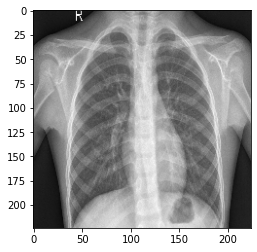

In [25]:
img = cv2.imread("/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg")
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.show()

In [26]:
image = np.expand_dims(img,axis=0)

In [27]:
model.predict(image)


array([[1., 0.]], dtype=float32)